# Praca Domowa 5 - Piotr Sieńko

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Wstęp

Na początek, postanowiłem przyjrzeć się naszemu zbiorowi danych

In [2]:
data = pd.read_csv('clustering.csv', names = ['x','y'])
data.head()


,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


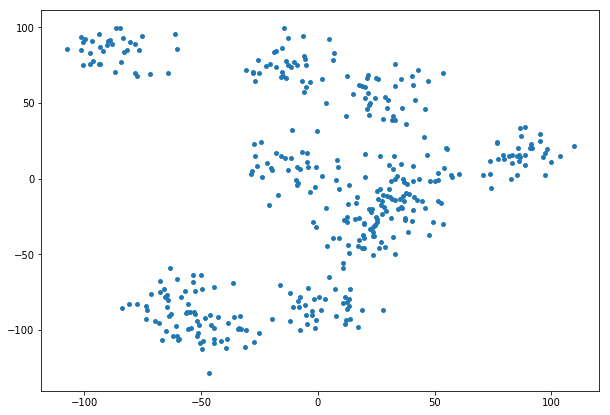

In [3]:
plt.figure(figsize = (10, 7))
plt.scatter(data.x, data.y, s = 15)
plt.show()

Zbiór jest dwuwymiarowy, co ułatwia wizualizację wyników. Na pierwszy rzut oka wydaje się że najbardziej naturalnym podziałem będzie 8 lub 5 podzbiorów.

# 2. Metoda k-Medoidów

Pierwszym zastosowanym algorytmem będzie metoda k-medoidów. Do optymalizacji liczby klastrów użyłem "elbow method" z sumą odległosci od środka skupienia.

In [4]:
from sklearn_extra.cluster import KMedoids

# Funkcja tworząca modele i rysująca scatter plota

def plot_kmedoids_clusters(X, n_clusters):
    
    # Tworzenie modelu i predykcja
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0, init='random')
    kmedoids.fit(X)
    y_kmedoids = kmedoids.predict(X)
    
    # Plot podziału zbioru
    plt.figure(figsize = (10, 7))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmedoids, s=40, cmap='plasma')

    # Zaznaczenie centroidów
    centers = kmedoids.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title('K-medoids clusters')
    plt.show()

In [5]:
# Funkcja licząca sumę odległości od środków skupienia dla każdego k

def count_wcs_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmedoids = KMedoids(n_clusters=k,  init='random', random_state=0)
        kmedoids.fit(X)
        y_kmedoids = kmedoids.predict(X)
        wcs = kmedoids.inertia_
        scores.append(wcs)
    return scores



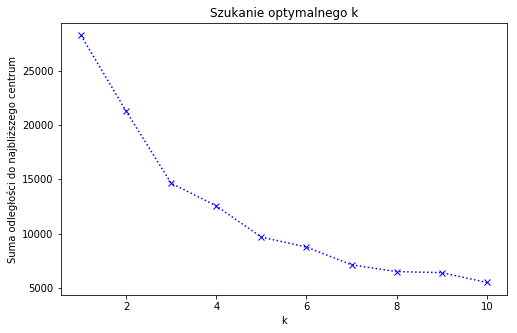

In [6]:
# wyliczanie punktów
wcs_vec = count_wcs_scores(data, 10)
x_ticks = list(range(1, len(wcs_vec) + 1))

# Elbow Plot
plt.figure(figsize = (8, 5))
plt.plot(x_ticks, wcs_vec, 'bx:')
plt.xlabel('k')
plt.ylabel('Suma odległości do najbliższego centrum')
plt.title('Szukanie optymalnego k')
plt.show()

Sprawdźmy, jak na wykresie wyglądają podziały dla k = 3, 5, 8. Wydają się one najbardziej obiecujące.

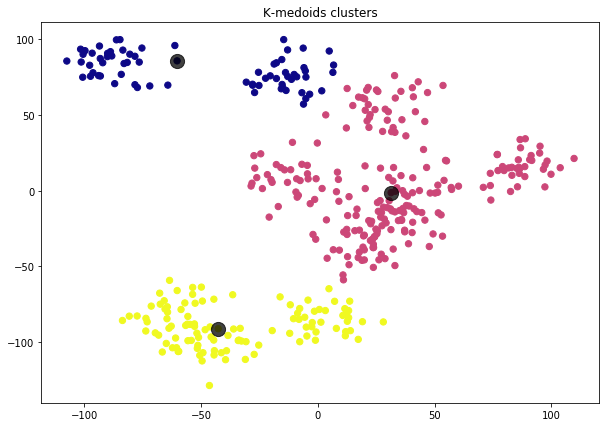

In [7]:
plot_kmedoids_clusters(data, n_clusters=3)

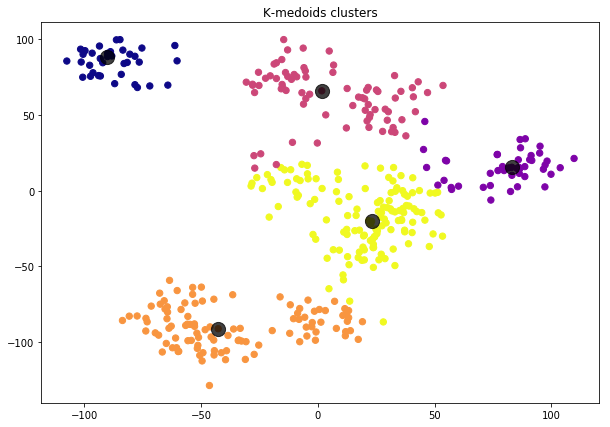

In [8]:
plot_kmedoids_clusters(data, n_clusters=5)

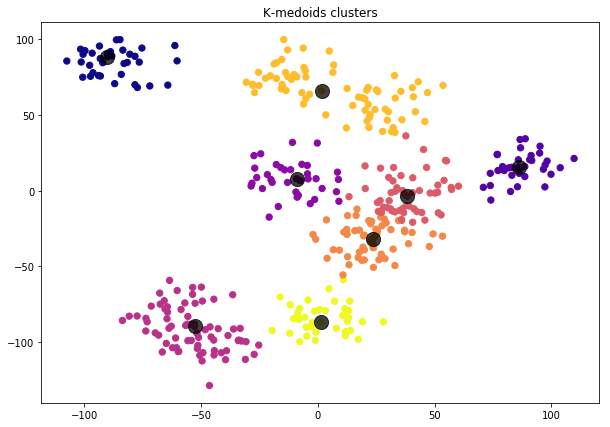

In [9]:
plot_kmedoids_clusters(data, n_clusters=8)

Przy wszystkich badanych wartościach k, wyniki są umiarkowanie zadowalające. Najbardziej naturalny podział na 8 podzbiorów jest zniekształcony przez podział centralnej grupy punktów na 3 podzbiory i pozostawienie górnej grupy punktów jako całości. Podział przy k = 5 jest nieznacznie zaburzony, wydaje się, iż część punktów mogłaby być inaczej przydzielona.

# 3. Metoda Aglomeracyjna

Drugą metodą jest metoda aglomeracyjna. W tym przykładzie, do znalezienia optymalnej liczby k wykorzystam miarę _Silhouette_.

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Funkcja licząca miarę Silhouette

def count_clustering_scores(X, cluster_num):
    scores = []    
    for k in cluster_num:
        model = AgglomerativeClustering(n_clusters=k)
        labels = model.fit_predict(X)
        wcss = silhouette_score(X, labels)
        scores.append(wcss)
        
    return scores

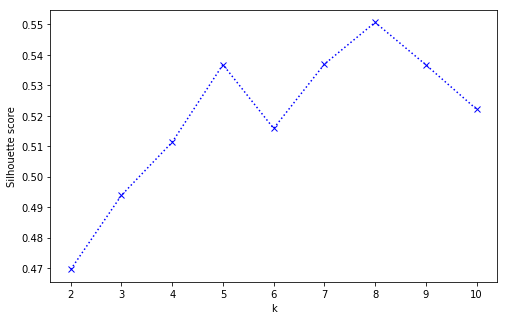

In [15]:
cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores(data, cluster_num_seq)

plt.figure(figsize = (8, 5))
plt.plot(cluster_num_seq, silhouette_vec, 'bx:')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()



Przyjrzyjmy się punktom z największą miarą _Silhouette_.

In [12]:
def plot_agg_clusters(X, n_clusters):
    
    model = AgglomerativeClustering(n_clusters= n_clusters)
    y = model.fit_predict(X)
    plt.figure(figsize = (10, 7))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=40, cmap='plasma')


    plt.title('Agglomerative clusters')
    plt.show()

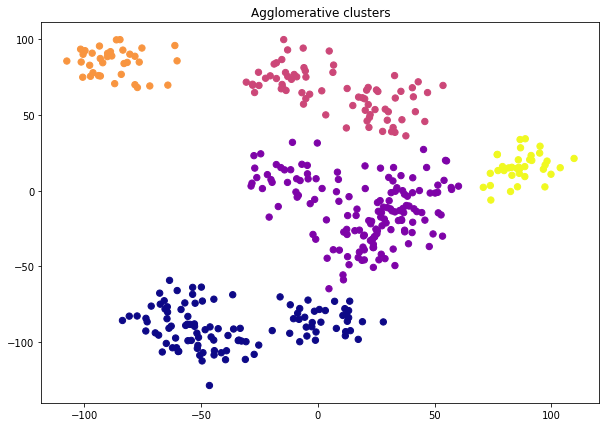

In [13]:
plot_agg_clusters(data, 5)

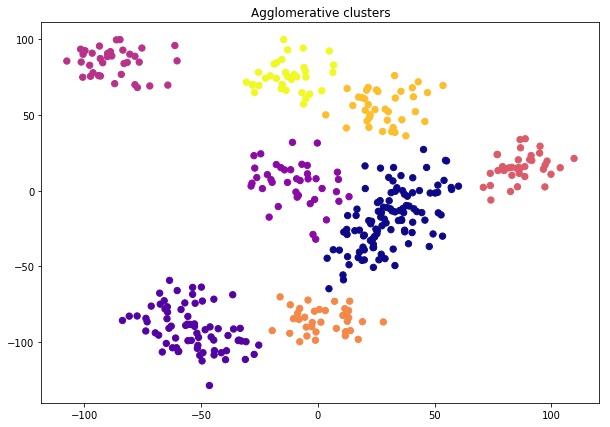

In [14]:
plot_agg_clusters(data, 8)

Metoda aglomeracyjna pogrupowała nasz zbiór danych w bardziej naturalny sposób niż K-medoids. W obu przypadkach przy ustalonym k, podzieliłbym dane punkty tak samo jak zrobił to algorytm. W przypadku k = 5, aglomeracja zadziałała podobnie jak K-medoids, jednak wydaje się być bardziej dokładna przy odstających obserwacjach.